<h4><strong>Реализация методов одномерного поиска с точностью 0,001 для 6 варианта exp(x), x ∊ [0,100]</strong> </h4>

<b>Аналитическое решение:</b> <br>Очевидно, что минимальное значение функция exp(x) примет при x=0 и будет равна 1.

In [99]:
import numpy as np
import time
import pandas as pd
import math
from matplotlib import pyplot as plt

<b>Численные методы решения задачи</b>


In [9]:
def f(x):
    return np.exp(x)

min_f_list = []
min_x_list = []
iterations_list = []
exec_time_list = []
final_interval_length_list=[]

<b>Метод половинного деления</b>


Таблица результатов:
Итерация	Начало		Конец		Длина интервала		Отношение
1		0.000000	50.000000	50.000000		N/A
2		0.000000	25.000000	25.000000		0.5
3		0.000000	12.500000	12.500000		0.5
4		0.000000	6.250000	6.250000		0.5
5		0.000000	3.125000	3.125000		0.5
6		0.000000	1.562500	1.562500		0.5
7		0.000000	0.781250	0.781250		0.5
8		0.000000	0.390625	0.390625		0.5
9		0.000000	0.195312	0.195312		0.5
10		0.000000	0.097656	0.097656		0.5
11		0.000000	0.048828	0.048828		0.5
12		0.000000	0.024414	0.024414		0.5
13		0.000000	0.012207	0.012207		0.5
14		0.000000	0.006104	0.006104		0.5
15		0.000000	0.003052	0.003052		0.5
16		0.000000	0.001526	0.001526		0.5
17		0.000000	0.000763	0.000763		0.5

Метод половинного деления: Минимальное значение функции - 1.0, значение x - 0, число итераций - 17, время выполнения - 0.0 секунд


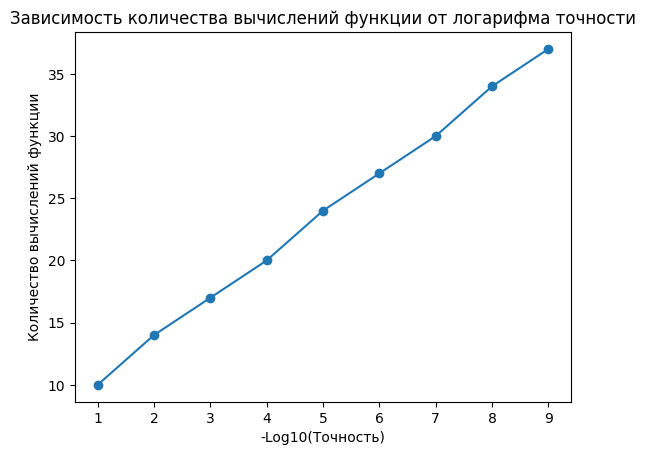

In [101]:
def find_min_half_interval(start, end, tol):
    iterations = 0
    data = []  
    prev_interval_length = float('inf')  
    while end - start > tol:
        iterations += 1
        mid = (start + end) / 2
        if f(mid) > f(start):
            end = mid
        else:
            start = mid

        interval_length = end - start
        ratio = interval_length / prev_interval_length if iterations > 1 else None
        
        data.append([iterations, start, end, interval_length, ratio])
    
        prev_interval_length = interval_length

    return start, f(start), iterations, data

tolerance = float(input("Введите точность: "))

start_time = time.time()

result = find_min_half_interval(0, 100, tolerance)

end_time = time.time()
exec_time = end_time - start_time

if isinstance(result, tuple):
    min_x, min_f, iterations, table_data = result

    print("\nТаблица результатов:")
    print("Итерация\tНачало\t\tКонец\t\tДлина интервала\t\tОтношение")
    for row in table_data:
        print(f"{row[0]}\t\t{row[1]:.6f}\t{row[2]:.6f}\t{row[3]:.6f}\t\t{row[4] if row[4] is not None else 'N/A'}")

    print(f"\nМетод половинного деления: Минимальное значение функции - {min_f}, значение x - {min_x}, число итераций - {iterations}, время выполнения - {exec_time} секунд")
    min_f_list.append(min_f)
    min_x_list.append(min_x)
    iterations_list.append(iterations)
    exec_time_list.append(exec_time)

    tolerances = [10**(-i) for i in range(1, 10)]
    iterations_list1 = [find_min_half_interval(0, 100, tol)[2] for tol in tolerances]

    plt.plot([-math.log10(tol) for tol in tolerances], iterations_list1, marker='o')
    plt.xlabel('-Log10(Точность)')
    plt.ylabel('Количество вычислений функции')
    plt.title('Зависимость количества вычислений функции от логарифма точности')
    plt.show()
else:
    iterations = result
    print(f"\nМетод половинного деления: Точность - {tolerance}, число итераций - {iterations}, время выполнения - {end_time - start_time:.6f} секунд")


<b>Метод Золотого сечения</b>


Таблица результатов:
Итерация	Начало		Конец		Длина интервала		Отношение
1		0.000000	61.800000	61.800000		N/A
2		0.000000	38.192400	38.192400		0.3818770226537217
3		0.000000	23.602903	23.602903		0.3818770226537217
4		0.000000	14.586594	14.586594		0.3818770226537217
5		0.000000	9.014515	9.014515		0.3818770226537217
6		0.000000	5.570970	5.570970		0.38187702265372164
7		0.000000	3.442860	3.442860		0.38187702265372164
8		0.000000	2.127687	2.127687		0.3818770226537217
9		0.000000	1.314911	1.314911		0.38187702265372164
10		0.000000	0.812615	0.812615		0.38187702265372175
11		0.000000	0.502196	0.502196		0.3818770226537217
12		0.000000	0.310357	0.310357		0.3818770226537217
13		0.000000	0.191801	0.191801		0.38187702265372164
14		0.000000	0.118533	0.118533		0.3818770226537217
15		0.000000	0.073253	0.073253		0.38187702265372164
16		0.000000	0.045271	0.045271		0.3818770226537217
17		0.000000	0.027977	0.027977		0.38187702265372164
18		0.000000	0.017290	0.017290		0.3818770226537216
19		0.000000	0.010

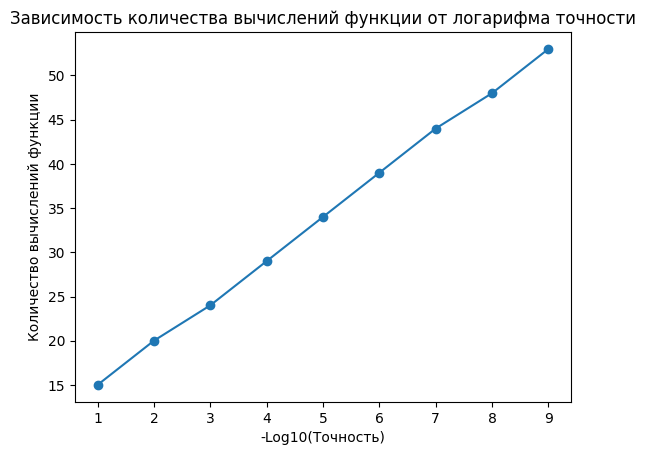

In [102]:
import time
import math
import matplotlib.pyplot as plt

def find_min_golden_section(start, end, tol):
    iterations = 0
    data = []

    while end - start > tol:
        iterations += 1
        mid1 = start + (end - start) * 0.382
        mid2 = start + (end - start) * 0.618

        if f(mid1) > f(mid2):
            start = mid1
        else:
            end = mid2

        interval_length = end - start
        ratio = (end - mid1) / (mid2 - start) if iterations > 1 else None

        data.append([iterations, start, end, interval_length, ratio])

    return start, f(start), iterations, data

def plot_iterations_vs_tolerance_golden(tolerances):
    iterations_list1 = [find_min_golden_section(0, 100, tol)[2] for tol in tolerances]
    plt.plot([-math.log10(tol) for tol in tolerances], iterations_list1, marker='o')
    plt.xlabel('-Log10(Точность)')
    plt.ylabel('Количество вычислений функции')
    plt.title('Зависимость количества вычислений функции от логарифма точности')
    plt.show()

tolerance = float(input("Введите точность: "))
start_time = time.time()
result = find_min_golden_section(0, 100, tolerance)
end_time = time.time()
exec_time = end_time - start_time

if isinstance(result, tuple):
    min_x, min_f, iterations, table_data = result

    print("\nТаблица результатов:")
    print("Итерация\tНачало\t\tКонец\t\tДлина интервала\t\tОтношение")

    for row in table_data:
        print(f"{row[0]}\t\t{row[1]:.6f}\t{row[2]:.6f}\t{row[3]:.6f}\t\t{row[4] if row[4] is not None else 'N/A'}")

    print(f"\nМетод золотого сечения: Минимальное значение функции - {min_f}, значение x - {min_x}, число итераций - {iterations}, время выполнения - {exec_time:.6f} секунд")

    min_f_list.append(min_f)
    min_x_list.append(min_x)
    iterations_list.append(iterations)
    exec_time_list.append(exec_time)

    tolerances = [10**(-i) for i in range(1, 10)]
    plot_iterations_vs_tolerance_golden(tolerances)
else:
    iterations = result
    print(f"\nМетод золотого сечения: Точность - {tolerance}, число итераций - {iterations}, время выполнения - {exec_time:.6f} секунд")



<b>Метод Фибоначчи</b>


Таблица результатов:
Итерация	Начало		Конец		Длина интервала		Отношение
1		0.000000	61.803399	61.803399		N/A
2		0.000000	38.196601	38.196601		1.618033988749895
3		0.000000	23.606798	23.606798		1.618033988749895
4		0.000000	14.589803	14.589803		1.618033988749895
5		0.000000	9.016994	9.016994		1.618033988749895
6		0.000000	5.572809	5.572809		1.618033988749895
7		0.000000	3.444185	3.444185		1.6180339887498947
8		0.000000	2.128624	2.128624		1.6180339887498951
9		0.000000	1.315562	1.315562		1.618033988749895
10		0.000000	0.813062	0.813062		1.618033988749895
11		0.000000	0.502500	0.502500		1.618033988749895
12		0.000000	0.310562	0.310562		1.618033988749895
13		0.000000	0.191938	0.191938		1.618033988749895
14		0.000000	0.118624	0.118624		1.6180339887498951
15		0.000000	0.073314	0.073314		1.618033988749895
16		0.000000	0.045310	0.045310		1.618033988749895
17		0.000000	0.028003	0.028003		1.6180339887498947
18		0.000000	0.017307	0.017307		1.618033988749895
19		0.000000	0.010696	0.010696		1.6180

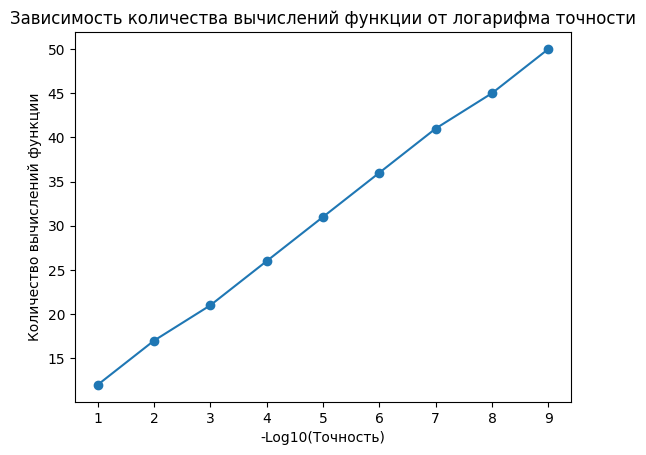

In [104]:
def fibonacci_method(a, b, tol):
    fib_sequence = [1, 1]

    while fib_sequence[-1] < (b - a) / tol:
        fib_sequence.append(fib_sequence[-1] + fib_sequence[-2])

    rho = 0.5 * (1.0 + math.sqrt(5.0))
    c = b - (b - a) / rho
    d = a + (b - a) / rho
    fc = f(c)
    fd = f(d)
    iterations = 0
    data = []

    while abs(c - d) > tol:
        iterations += 1

        if fc < fd:
            b = d
            d = c
            c = b - (b - a) / rho
            fd = fc
            fc = f(c)
        else:
            a = c
            c = d
            d = a + (b - a) / rho
            fc = fd
            fd = f(d)

        xmin = 0.5 * (a + b)
        ymin = f(xmin)
        interval_length = b - a
        ratio = interval_length / (b - c) if iterations > 1 else None

        data.append([iterations, a, b, interval_length, ratio])

    return ymin, xmin, iterations, data

def plot_iterations_vs_tolerance_fibonacci(tolerances):
    iterations_list1 = [fibonacci_method(0, 100, tol)[2] for tol in tolerances]
    plt.plot([-math.log10(tol) for tol in tolerances], iterations_list1, marker='o')
    plt.xlabel('-Log10(Точность)')
    plt.ylabel('Количество вычислений функции')
    plt.title('Зависимость количества вычислений функции от логарифма точности')
    plt.show()

tolerance = float(input("Введите точность: "))
start_time = time.time()
result = fibonacci_method(0, 100, tolerance)
end_time = time.time()
exec_time = end_time - start_time

if isinstance(result, tuple):
    min_f, min_x, iterations, table_data = result

    print("\nТаблица результатов:")
    print("Итерация\tНачало\t\tКонец\t\tДлина интервала\t\tОтношение")

    for row in table_data:
        print(f"{row[0]}\t\t{row[1]:.6f}\t{row[2]:.6f}\t{row[3]:.6f}\t\t{row[4] if row[4] is not None else 'N/A'}")

    print(f"\nМетод Фибоначчи: Минимальное значение функции - {min_f}, значение x - {min_x}, число итераций - {iterations}, время выполнения - {exec_time:.6f} секунд")

    min_f_list.append(min_f)
    min_x_list.append(min_x)
    iterations_list.append(iterations)
    exec_time_list.append(exec_time)

    tolerances = [10**(-i) for i in range(1, 10)]
    plot_iterations_vs_tolerance_fibonacci(tolerances)
else:
    iterations = result
    print(f"\nМетод Фибоначчи: Точность - {tolerance}, число итераций - {iterations}, время выполнения - {exec_time:.6f} секунд")

<b>Метод Ньютона</b>
<br>Данный код использует функцию minimize из библиотеки SciPy с методом оптимизации 'L-BFGS-B'. Этот метод относится к квазиньютоновским методам, который является обобщением метода Ньютона. Он основан на аппроксимации обратного гессиана и обычно эффективен для задач оптимизации с ограничениями.
'L-BFGS-B' является методом, который включает в себя идеи из метода Ньютона, но с определенными модификациями для улучшения производительности и учета ограничений и отлично подходит для поставленной задачи поиска минимума функции на интервале.

Метод Ньютона: Минимальное значение функции - 1.0, значение x - [0.], число итераций - 4


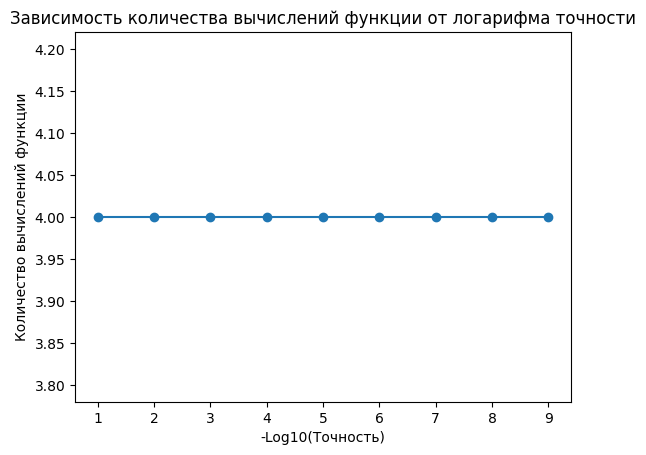

In [130]:
from scipy.optimize import minimize

def newtons_method(tol):
    result = minimize(f, x0=50, bounds=[(0, 100)], method='L-BFGS-B', options={'ftol': tol})
    return result.fun, result.x, result.nfev

def plot_iterations_vs_tolerance_newton(tolerances):
    iterations_list = [newtons_method(tol)[2] for tol in tolerances]
    plt.plot([-math.log10(tol) for tol in tolerances], iterations_list, marker='o')
    plt.xlabel('-Log10(Точность)')
    plt.ylabel('Количество вычислений функции')
    plt.title('Зависимость количества вычислений функции от логарифма точности')
    plt.show()

tolerance = float(input("Введите точность: "))
min_f, min_x, iterations = newtons_method(tolerance)

print(f"Метод Ньютона: Минимальное значение функции - {min_f}, значение x - {min_x}, число итераций - {iterations}")

min_f_list.append(min_f)
min_x_list.append(min_x)
iterations_list.append(iterations)

tolerances = [10**(-i) for i in range(1, 10)]
plot_iterations_vs_tolerance_newton(tolerances)

Вывод интервалов на каждой итерации не предоставляется возможным.

In [18]:
import math
import time

def func(x):
    return math.exp(x)

def derivative(x):
    return math.exp(x)

def newton_method(initial_guess, tolerance, interval):
    x = initial_guess
    iteration = 0
    data = []

    start_time = time.time()

    while abs(derivative(x)) > tolerance and interval[0] <= x <= interval[1]:
        f_x = func(x)
        data.append([iteration, x, f_x, interval[0], interval[1]])

        x = x - f_x / derivative(x)
        iteration += 1

    end_time = time.time()
    exec_time = end_time - start_time

    if x < interval[0]:
        x = interval[0]
    elif x > interval[1]:
        x = interval[1]

    final_interval_length = interval[1] - interval[0]

    return x, func(x), final_interval_length, iteration, exec_time, data

# Rest of the code remains unchanged
initial_guess = 50
interval = (0, 100)
tolerance = 0.001

min_x, min_f, _, iterations, exec_time, data = newton_method(initial_guess, tolerance, interval)

interval_length = (interval[1] - interval[0]) / 2**iterations
print(f"Метод Ньютона: Минимальное значение функции - {min_f}, значение x - {min_x}, "
      f"число итераций - {iterations}, время выполнения - {exec_time:.6f} секунд, "
      f"длина конечного отрезка - {interval_length}")

# Print interval boundaries at each iteration
print("\nТаблица результатов:")
print("Итерация\tX\t\t\tF(X)\t\t\tНачало интервала\tКонец интервала")

for row in data:
    print(f"{row[0]}\t\t{row[1]:.6f}\t{row[2]:.6f}\t{row[3]:.6f}\t\t{row[4]:.6f}")


Метод Ньютона: Минимальное значение функции - 1.0, значение x - 0, число итераций - 51, время выполнения - 0.000000 секунд, длина конечного отрезка - 4.440892098500626e-14

Таблица результатов:
Итерация	X			F(X)			Начало интервала	Конец интервала
0		50.000000	5184705528587072045056.000000	0.000000		100.000000
1		49.000000	1907346572495099789312.000000	0.000000		100.000000
2		48.000000	701673591209763143680.000000	0.000000		100.000000
3		47.000000	258131288619006754816.000000	0.000000		100.000000
4		46.000000	94961194206024482816.000000	0.000000		100.000000
5		45.000000	34934271057485094912.000000	0.000000		100.000000
6		44.000000	12851600114359308288.000000	0.000000		100.000000
7		43.000000	4727839468229346304.000000	0.000000		100.000000
8		42.000000	1739274941520500992.000000	0.000000		100.000000
9		41.000000	639843493530054912.000000	0.000000		100.000000
10		40.000000	235385266837020000.000000	0.000000		100.000000
11		39.000000	86593400423993744.000000	0.000000		100.000000
12		38.000

<b>Создание таблицы и экспорт в Excel</b>

In [106]:
import pandas as pd


df = pd.DataFrame({'Метод': ['Метод половинного деления', 'Метод золотого сечения', 'Метод Фибоначчи', 'Метод Ньютона'], 'Минимальное значение f(x)': min_f_list, 'Минимальное значение x': min_x_list, 'Число итераций': iterations_list, 'Время выполнения': exec_time_list})
df.to_excel('Таблица методов.xlsx', index=False)